# Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'/Users/kurtson/Desktop/House Sales'

In [3]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'cleaned_home.csv'), index_col = False)

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [5]:
#Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

# Subsetting

In [38]:
avgyear = df.groupby('year_built')['year_built'].count()

In [39]:
avgyear

year_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: year_built, Length: 116, dtype: int64

In [6]:
avg_price_year = df.groupby('year_built')['price'].mean()

In [7]:
avg_price_year

year_built
1900    581387.206897
1901    556935.931034
1902    673007.407407
1903    480958.195652
1904    583756.644444
            ...      
2011    544522.000000
2012    527447.335294
2013    678545.452736
2014    683681.754919
2015    759785.157895
Name: price, Length: 116, dtype: float64

In [8]:
avg_sqft_year = df.groupby('year_built')['sqft_living'].mean()

In [9]:
avg_sqft_year

year_built
1900    1732.011494
1901    1763.620690
1902    1919.629630
1903    1507.739130
1904    1603.177778
           ...     
2011    2313.684615
2012    2378.741176
2013    2636.592040
2014    2615.389982
2015    2596.315789
Name: sqft_living, Length: 116, dtype: float64

In [48]:
result = pd.DataFrame({'year': avgyear.index, 'avg_price_year': avg_price_year.values, 'avg_sqft_year': avg_sqft_year.values})

In [49]:
result

,year,avg_price_year,avg_sqft_year
0,1900,581387.206897,1732.011494
1,1901,556935.931034,1763.620690
2,1902,673007.407407,1919.629630
3,1903,480958.195652,1507.739130
4,1904,583756.644444,1603.177778
...,...,...,...
111,2011,544522.000000,2313.684615
112,2012,527447.335294,2378.741176
113,2013,678545.452736,2636.592040
114,2014,683681.754919,2615.389982


In [50]:
result['year'] = result['year'].astype(str)

In [51]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            116 non-null    object 
 1   avg_price_year  116 non-null    float64
 2   avg_sqft_year   116 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


#### I selected these data points as I want to see at pricing trends based on the age of the home. 

In [52]:
# Reset index so that you can use the "year_built" column as a filter

result_2 = result.reset_index()

In [53]:
result_2.head()

,index,year,avg_price_year,avg_sqft_year
0,0,1900,581387.206897,1732.011494
1,1,1901,556935.931034,1763.620690
2,2,1902,673007.407407,1919.629630
3,3,1903,480958.195652,1507.739130
4,4,1904,583756.644444,1603.177778


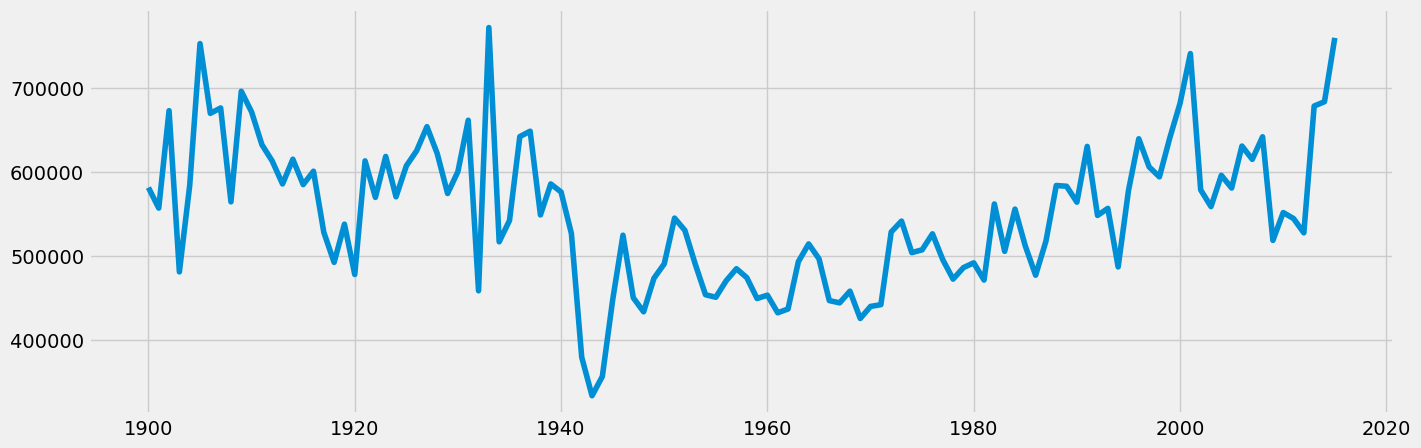

In [54]:
# Plot avg_price_year

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_price_year)

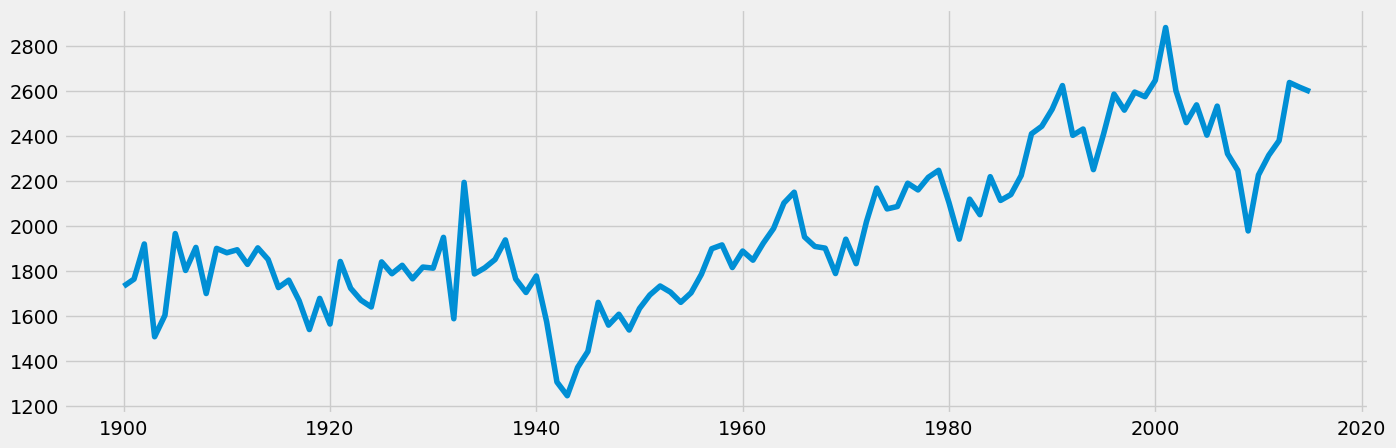

In [55]:
# Plot avg_sqft_year

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_sqft_year)

# Time Series Analysis - Decomposition

In [57]:
# Set the "year" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['year']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,avg_price_year,avg_sqft_year
datetime,,
1900-01-01,581387.206897,1732.011494
1901-01-01,556935.931034,1763.620690
1902-01-01,673007.407407,1919.629630
1903-01-01,480958.195652,1507.739130
1904-01-01,583756.644444,1603.177778


In [58]:
result

,avg_price_year,avg_sqft_year
datetime,,
1900-01-01,581387.206897,1732.011494
1901-01-01,556935.931034,1763.620690
1902-01-01,673007.407407,1919.629630
1903-01-01,480958.195652,1507.739130
1904-01-01,583756.644444,1603.177778
...,...,...
2011-01-01,544522.000000,2313.684615
2012-01-01,527447.335294,2378.741176
2013-01-01,678545.452736,2636.592040


In [60]:
column_to_drop = 'avg_sqft_year'

In [61]:
result = result.drop(column_to_drop, axis=1)

In [63]:
result

,avg_price_year
datetime,
1900-01-01,581387.206897
1901-01-01,556935.931034
1902-01-01,673007.407407
1903-01-01,480958.195652
1904-01-01,583756.644444
...,...
2011-01-01,544522.000000
2012-01-01,527447.335294
2013-01-01,678545.452736


In [64]:
# Reset index so that you can use the "year_built" column as a filter

result_1 = result.reset_index()

In [65]:
result_1

,datetime,avg_price_year
0,1900-01-01,581387.206897
1,1901-01-01,556935.931034
2,1902-01-01,673007.407407
3,1903-01-01,480958.195652
4,1904-01-01,583756.644444
...,...,...
111,2011-01-01,544522.000000
112,2012-01-01,527447.335294
113,2013-01-01,678545.452736
114,2014-01-01,683681.754919


In [66]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        116 non-null    datetime64[ns]
 1   avg_price_year  116 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.9 KB


In [74]:
time_series = result_1['avg_price_year']

In [75]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [76]:
result_1.set_index('datetime', inplace=True)

In [80]:
time_series = result_1['avg_price_year']

In [81]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [83]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [88]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

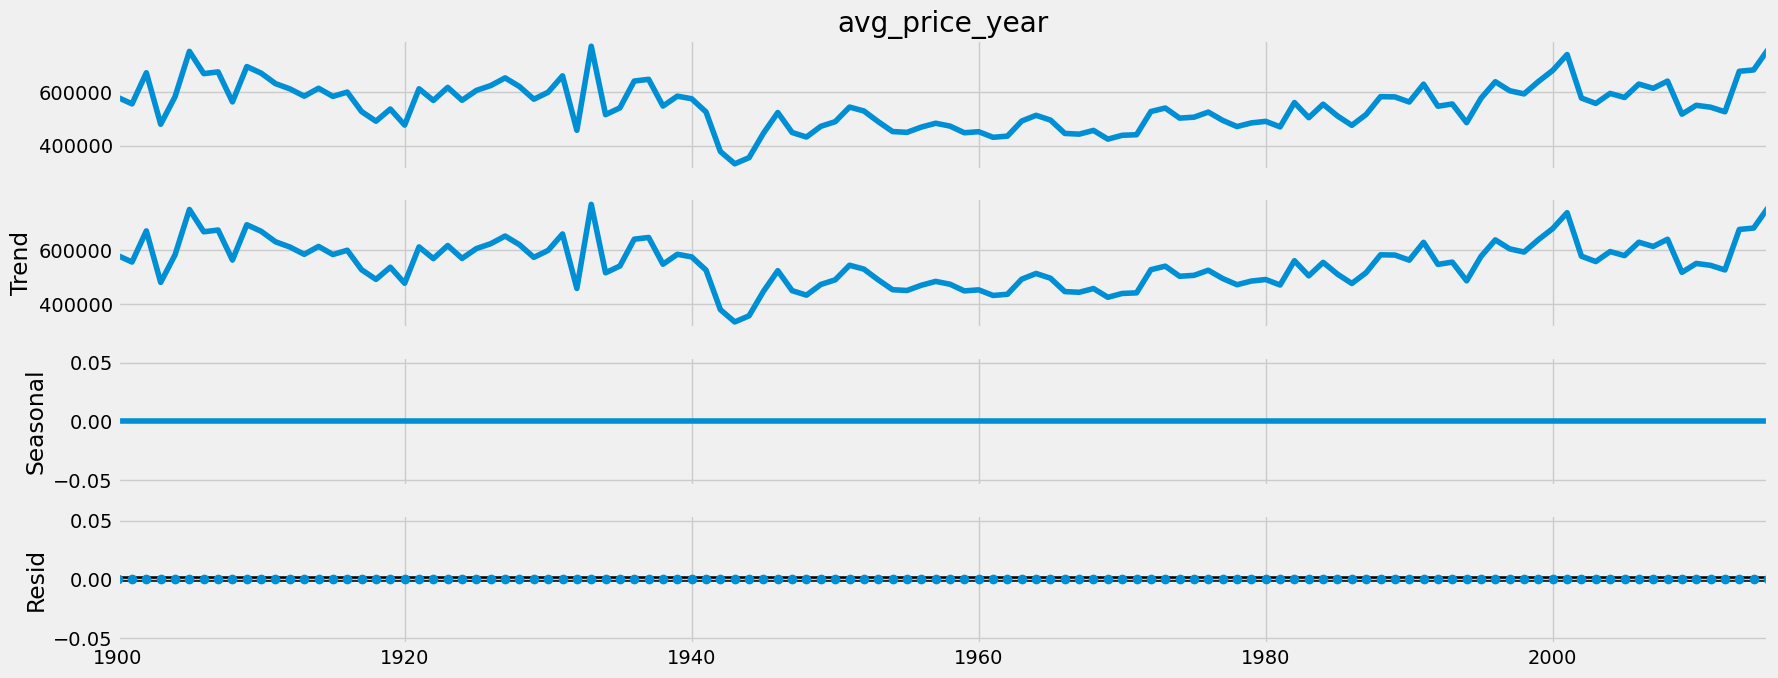

In [89]:
# Plot the separate components

decomposition.plot()
plt.show()

In [90]:
result_1

,avg_price_year
datetime,
1900-01-01,581387.206897
1901-01-01,556935.931034
1902-01-01,673007.407407
1903-01-01,480958.195652
1904-01-01,583756.644444
...,...
2011-01-01,544522.000000
2012-01-01,527447.335294
2013-01-01,678545.452736


#### I can see the trend using this chart. Unfortunately with the data that I have selected, there is no need for seeing seasonality.

In [91]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['avg_price_year'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.984089
p-value                          0.036407
Number of Lags Used              1.000000
Number of Observations Used    114.000000
Critical Value (1%)             -3.489058
Critical Value (5%)             -2.887246
Critical Value (10%)            -2.580481
dtype: float64


#### I can see that my test statistic is slightly smaller than the critical value of 5% and larger than the critical value of 1% and I have a satisfactory P value.